## Using Linear Regression model with scikit-learn 

In [1]:
# Import package 
import numpy as np
from sklearn.linear_model import LinearRegression # linear_model 을 LinearRegression 이름으로 가져오는 것 

In [4]:
# x = [0,1,2,3,4,5,6,7,8,9]
# 1차원 데이터
# aragne = array + range
x = np.arange(10)
print(x.shape)
print(type(x))


(10,)
<class 'numpy.ndarray'>


In [6]:
# x.shqpe => (10,1)
# 2차원 데이터
x = np.arange(10).reshape(-1,1) # 10개를 만들어라 
print(x)
print(x.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(10, 1)


In [17]:
x = np.arange(12)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [18]:
# 행과 열중에 행에 -1을 입력한경우
# 열을 특정숫자로 고정하고 행을 데이터에 맞게 설정해준다.
x.reshape(-1,1)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

In [19]:
x.reshape(2,-1)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [23]:
# 직선의 방정식을 만들기 위해
# y =2x+1 에 대한 데이터셋을 만든다.
# y =wx+b
x = np.arange(10).reshape(-1, 1)
y = (2*x + 1).reshape(-1,1)
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]
 [13]
 [15]
 [17]
 [19]]


In [24]:
# 모델 선언(정의)
model = LinearRegression()
model

LinearRegression()

In [25]:
# 학습(Training)
# model.fit(문제, 답)
model.fit(x,y)

LinearRegression()

In [26]:
# 예측
# 학습이 끝나게 되면 이전에 학습되지 않은 x데이터를 
# 입력해서 예측이 잘되는지 확인한다.
prediction = model.predict([[10.0]])
prediction

array([[21.]])

In [27]:
prediction = model.predict([[20.3]])
prediction

array([[41.6]])

## 데이터 분할하는 메소드를 사용해보자

### train_test_split() 메소드를 활용해보자

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
X = [[0,1],[2,3],[4,5],[6,7],[8,9]]
Y = [0,1,2,3,4]

# X의 전체 데이터 5개 중에 20%를 test 로 주고 싶다
# train : test = 4:1 
# random_state 는 random seed 값을 의미한다. random seed 값을 주지 않으면 동일한 결과가 나오지 않음. randome state 을 고정한다는 의미.

# 데이터(X)만 train_test_split 에 넣은 경우
X_train, X_test = train_test_split(X, test_size=0.2 , random_state=123)

In [16]:
print(X_train)
print(X_test)

[[6, 7], [8, 9], [0, 1], [4, 5]]
[[2, 3]]


In [20]:
# 데이터(X)와 레이블(Y)를 함께 train_test_split 에 넣은 경우
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 , random_state=123)

In [21]:
print(X_train) # 3하고 6하고 , 4하고 8하고 , 0하고 0하고, 2하고 4하고. 순서가 맞음
print(Y_train)
print(X_test)
print(Y_test)

[[6, 7], [8, 9], [0, 1], [4, 5]]
[3, 4, 0, 2]
[[2, 3]]
[1]


## 당뇨병 1년후 병의 진전도 예측 모델

### scikit-learn 데이터셋 중에 load_diabetes() 메소드

In [22]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [28]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [29]:
features = diabetes.feature_names
print('feature names:', features) # 열에 대한 항목을 가지고 옴  --> 녹화본 다시 볼것 현재 시간 10:50 약 2시간 정도 됐을 시간. 녹화기준

feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [30]:
print(diabetes.data.shape)v # data = x
print(diabetes.target.shape) # target = y 

(442, 10)
(442,)


In [31]:
X = diabetes.data
Y = diabetes.target

In [33]:
!pip install matplotlib

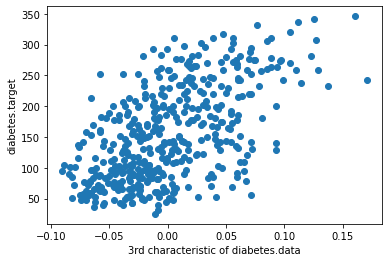

In [35]:
import matplotlib.pyplot as plt

# BMI 지수 X[2] 와 target (Y) 의 관계 그래프를 그려본다.
plt.scatter(X[:,2], Y)
plt.xlabel('3rd characteristic of diabetes.data')
plt.ylabel('diabetes.target')
plt.show()

In [37]:
bmi = X[:,np.newaxis,2] # 모든행, 0,1,2 의 열만 가져옴

print(bmi.shape) # 442행, 1열
print(bmi[:5]) # 0~4 행까지 데이터만 확인 

(442, 1)
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


In [38]:
# 442개의 데이터를 train 데이터와 test 데이터로 나눈다 

from sklearn.model_selection import train_test_split

# 442개를 8:2 로 나눠준다
bmi_train, bmi_test, y_train, y_test = train_test_split(bmi, Y, test_size=0.2, random_state = 123) 
# 나누고자 하는 bmi 와 target 인 Y 를 같이 나눠줌. 

In [39]:
print(bmi_train.shape) #(353,1)
print(y_train.shape) #(353,)
print(bmi_test.shape) #(89,1)
print(y_test.shape) #(89,)

(353, 1)
(353,)
(89, 1)
(89,)


In [40]:
from sklearn.linear_model import LinearRegression

# model 을 선언(정의)
model = LinearRegression()

In [41]:
# 모델을 학습 (training)
model.fit(bmi_train, y_train) # x = bmi_train, y = y_train (x 의 정답)

LinearRegression()

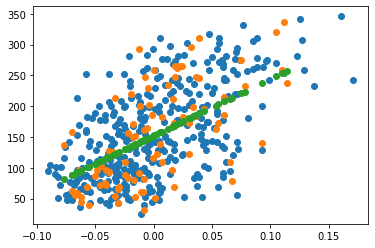

In [42]:
# 학습된 모델을 테스트 (확인)
y_pred = model.predict(bmi_test)
plt.scatter(bmi_train, y_train)
plt.scatter(bmi_test, y_test)
plt.scatter(bmi_test, y_pred)
plt.show() # blue - train,  oragne - test, green - prediction data